In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


Rows: 5110 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): gender, ever_married, work_type, Residence_type, bmi, smoking_status
dbl (6): id, age, hypertension, heart_disease, avg_glucose_level, stroke

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


stroke,age,avg_glucose_level
<fct>,<dbl>,<dbl>
Yes,67,228.69
Yes,80,105.92
Yes,78,219.84
⋮,⋮,⋮
No,9,71.88
No,82,71.97
No,51,166.29


stroke,age,avg_glucose_level
<fct>,<dbl>,<dbl>
Yes,61,202.21
Yes,49,171.23
Yes,79,174.12
⋮,⋮,⋮
No,80,83.75
No,35,82.99
No,44,85.28


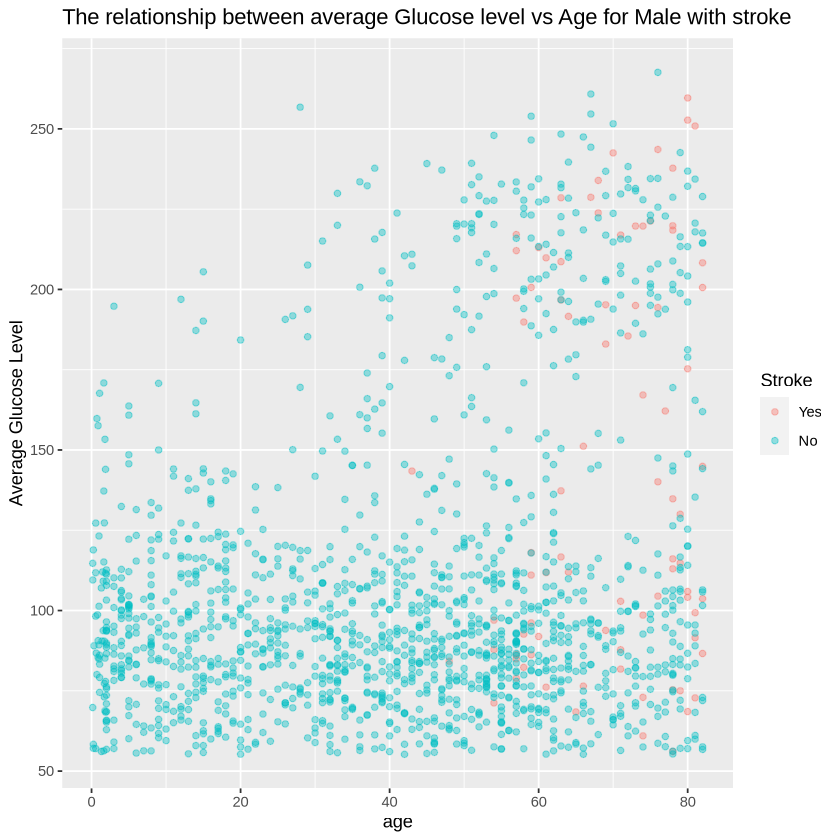

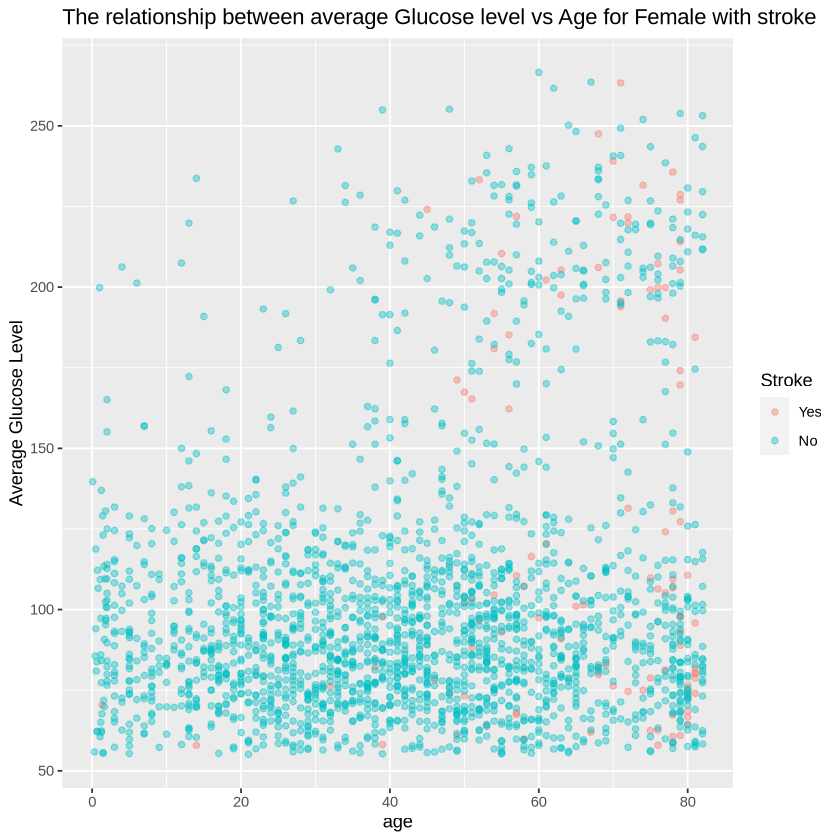

In [31]:
stroke_data <- read_csv('stroke_dataset.csv')


#question: does use only training data mean we have to split the data?
#question: do we need to find the best k variable from training and validation 


# Convert 1 = "Yes", 0 = "No" for the stroke column
stroke_column <- stroke_data |>
            mutate(stroke = as.character(stroke)) |>
            select(stroke) 
stroke_column[stroke_column == 1] <- "Yes"
stroke_column[stroke_column == 0] <- "No"


stroke_data["stroke"] <- stroke_column |>
        mutate(stroke = as_factor(stroke))

#Split the data into training
stroke_data_split <- initial_split(stroke_data, prop = 0.75, strata = stroke)  
stroke_data_train <- training(stroke_data_split)  
stroke_data_test <- testing(stroke_data_split)

#filter sample into two groups; male & female
stroke_data_male <- stroke_data_train |>
    filter(gender == "Male") |>
    select(stroke, age, avg_glucose_level)

stroke_data_female <- stroke_data_train |>
    filter(gender == "Female") |>
    select(stroke, age, avg_glucose_level)

#display the data into a table
stroke_data_male
stroke_data_female

#visualization
stroke_plot_male <- stroke_data_male |>
    ggplot(aes (x= age, y= avg_glucose_level, colour = stroke)) +
    geom_point(alpha = 0.4) +
    labs(x= "age", y = "Average Glucose Level", colour = "Stroke", title = "The relationship between average Glucose level vs Age for Male with stroke")

stroke_plot_male

stroke_plot_female <- stroke_data_female |>
    ggplot(aes (x= age, y= avg_glucose_level, colour = stroke)) +
    geom_point(alpha = 0.4) +
    labs(x= "age", y = "Average Glucose Level", colour = "Stroke" ,title = "The relationship between average Glucose level vs Age for Female with stroke")

stroke_plot_female

#summarize table ; number of rows, avg age, avg glucos level, # of ppl with stroke, # of ppl without stroke
stroke_data_male <- stroke_data_male

In [32]:
Predict how average glucose level and age effect the likelihood of getting a stroke for men in comparison to women.

ERROR: Error in parse(text = x, srcfile = src): <text>:1:9: unexpected symbol
1: Predict how
            ^



- Scatterplot
- Age vs glucose
- women vs men
- Prediction: whether the person will have a stroke
